In [218]:
import numpy as np
import pandas as pd
import plotly.express as px
import scipy
import scipy.stats

In [246]:
fname_rents = 'medianAskingRent_All.csv'
fname_zips = 'brooklyn_zip_neighborhood.csv'

In [247]:
rent_df = pd.read_csv(fname_rents)
rent_df['Borough'].unique()
rent_df = rent_df[rent_df['Borough']=='Brooklyn']
rent_df = rent_df.rename(columns={'areaName':'Neighborhood'})
zip_df = pd.read_csv(fname_zips)

In [248]:
double_neighborhoods = zip_df[zip_df['Neighborhood'].str.contains("/")]
double_neighborhoods

,Neighborhood,Zip
0,Bath Beach/Bensonhurst,11214
4,Brooklyn Heights/Cobble Hill,11201
5,Brower Park/Crown Heights,11213
8,Bushwick/Bedford-Stuyvesant,11221
10,Carroll Gardens/Red Hook,11231
18,Flatlands/Mill Basin,11234
20,Gravesend/Homecrest,11223
22,Homecrest/Madison,11229
23,Industry City/Sunset Park,11232
24,Kensington/Windsor Terrace,11218


In [249]:
lst0 = []
lst1 = []
for i in range (double_neighborhoods.shape[0]):
    
    d_neighborhoods = double_neighborhoods.iloc[i]['Neighborhood']
    print(i, d_neighborhoods)
    n_pair = d_neighborhoods.split("/")
    n_rows = rent_df.loc[rent_df['Neighborhood'].isin(n_pair)]
    if n_rows.shape[0] == 0:
        lst0.append(n_pair)
    elif n_rows.shape[0] == 1:
        lst1.append(n_pair)
    else:
        row_df = pd.DataFrame([[np.nan] * len(rent_df.columns)], columns=rent_df.columns)
        rent_df = rent_df.append(row_df, ignore_index=True)
        rent_df.iloc[-1:]['Neighborhood'] = d_neighborhoods
        rent_df.iloc[-1:]['Borough'] = n_rows.iloc[0]['Borough']
        rent_df.iloc[-1:]['areaType'] = n_rows.iloc[0]['areaType']
        rent_df.iloc[-1:,3:] = n_rows.iloc[:,3:].mean(axis=0)

    
#     print(n_pair)
#     print(n_rows.shape[0])
print(lst0)
print(lst1)
rent_df

0 Bath Beach/Bensonhurst
1 Brooklyn Heights/Cobble Hill
2 Brower Park/Crown Heights
3 Bushwick/Bedford-Stuyvesant
4 Carroll Gardens/Red Hook
5 Flatlands/Mill Basin
6 Gravesend/Homecrest
7 Homecrest/Madison
8 Industry City/Sunset Park
9 Kensington/Windsor Terrace
10 Park Slope/Gowanus
11 Park Slope/Windsor Terrace
12 Parkville/Bensonhurst
13 Sheepshead Bay/Brighton Beach
14

/Users/epavlov/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


 Vanderveer/Flatbush
15 Williamsburg/Bedford-Stuyvesant
[['Homecrest', 'Madison']]
[['Brower Park', 'Crown Heights'], ['Gravesend', 'Homecrest'], ['Industry City', 'Sunset Park'], ['Parkville', 'Bensonhurst'], ['Vanderveer', 'Flatbush']]


,Neighborhood,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08
0,Bath Beach,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1785.0,1695.0,1698.0,1750.0,1799.0,1750.0,1733.0,1799.0,1700.0,1750.0
1,Bay Ridge,Brooklyn,neighborhood,1350.0,1388.0,1350.0,1350.0,1350.0,1350.0,1300.0,...,1800.0,1750.0,1750.0,1750.0,1799.0,1750.0,1750.0,1750.0,1750.0,1800.0
2,Bedford-Stuyvesant,Brooklyn,neighborhood,1650.0,1650.0,1600.0,1650.0,1650.0,1593.0,1460.0,...,2300.0,2250.0,2250.0,2250.0,2261.0,2300.0,2383.0,2475.0,2599.0,2650.0
3,Bensonhurst,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1600.0,1525.0,1550.0,1625.0,1738.0,1650.0,1650.0,1700.0,1695.0,1700.0
4,Bergen Beach,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Kensington/Windsor Terrace,Brooklyn,neighborhood,1700.0,1712.5,1712.5,1787.5,1800.0,1825.0,1995.0,...,2315.0,2314.0,2312.5,2175.0,2250.0,2147.5,2000.0,2150.0,2299.0,2250.0
61,Park Slope/Gowanus,Brooklyn,neighborhood,2200.0,1875.0,2200.0,2200.0,2125.0,2485.0,2400.0,...,2700.0,2722.0,2645.0,2650.0,2597.5,2662.5,2724.5,2835.5,2863.0,2925.0
62,Park Slope/Windsor Terrace,Brooklyn,neighborhood,1900.0,1900.0,1925.0,1900.0,2125.0,2155.0,2197.5,...,2725.0,2700.0,2720.0,2587.5,2650.0,2550.0,2424.5,2549.0,2705.5,2675.0
63,Sheepshead Bay/Brighton Beach,Brooklyn,neighborhood,1400.0,1225.0,1200.0,1250.0,1750.0,1725.0,NaN,...,1992.5,1937.5,1879.0,1825.0,1847.5,1825.0,1868.5,1856.5,1850.0,1875.0


In [250]:
rent_df.loc[rent_df['Neighborhood']=='Crown Heights','Neighborhood'] = 'Parkville/Bensonhurst'
rent_df.loc[rent_df['Neighborhood']=='Gravesend','Neighborhood'] = 'Gravesend/Homecrest'
rent_df.loc[rent_df['Neighborhood']=='Sunset Park','Neighborhood'] = 'Industry City/Sunset Park'
rent_df.loc[rent_df['Neighborhood']=='Bensonhurst','Neighborhood'] = 'Parkville/Bensonhurst'
rent_df.loc[rent_df['Neighborhood']=='Flatbush','Neighborhood'] = 'Vanderveer/Flatbush'

In [251]:
axisvalues=list(range(1,len(rent_df.columns)-2))
def calc_slope(row):
    a = scipy.stats.linregress(row, y=axisvalues)
    return a.slope 

rent_df["Slope"]=rent_df.iloc[:,3:].apply(calc_slope,axis=1)
rent_df

,Neighborhood,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,Slope
0,Bath Beach,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1695.0,1698.0,1750.0,1799.0,1750.0,1733.0,1799.0,1700.0,1750.0,NaN
1,Bay Ridge,Brooklyn,neighborhood,1350.0,1388.0,1350.0,1350.0,1350.0,1350.0,1300.0,...,1750.0,1750.0,1750.0,1799.0,1750.0,1750.0,1750.0,1750.0,1800.0,0.140587
2,Bedford-Stuyvesant,Brooklyn,neighborhood,1650.0,1650.0,1600.0,1650.0,1650.0,1593.0,1460.0,...,2250.0,2250.0,2250.0,2261.0,2300.0,2383.0,2475.0,2599.0,2650.0,0.103747
3,Parkville/Bensonhurst,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1525.0,1550.0,1625.0,1738.0,1650.0,1650.0,1700.0,1695.0,1700.0,NaN
4,Bergen Beach,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Kensington/Windsor Terrace,Brooklyn,neighborhood,1700.0,1712.5,1712.5,1787.5,1800.0,1825.0,1995.0,...,2314.0,2312.5,2175.0,2250.0,2147.5,2000.0,2150.0,2299.0,2250.0,0.152445
61,Park Slope/Gowanus,Brooklyn,neighborhood,2200.0,1875.0,2200.0,2200.0,2125.0,2485.0,2400.0,...,2722.0,2645.0,2650.0,2597.5,2662.5,2724.5,2835.5,2863.0,2925.0,0.081169
62,Park Slope/Windsor Terrace,Brooklyn,neighborhood,1900.0,1900.0,1925.0,1900.0,2125.0,2155.0,2197.5,...,2700.0,2720.0,2587.5,2650.0,2550.0,2424.5,2549.0,2705.5,2675.0,0.141400
63,Sheepshead Bay/Brighton Beach,Brooklyn,neighborhood,1400.0,1225.0,1200.0,1250.0,1750.0,1725.0,NaN,...,1937.5,1879.0,1825.0,1847.5,1825.0,1868.5,1856.5,1850.0,1875.0,NaN


In [239]:
rent_df.iloc[:,3:] = rent_df.iloc[:,3:].dropna(how="all")

In [275]:
rent_df.drop(["Slope"], axis = 1)

,Neighborhood,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08
0,Bath Beach,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1785.0,1695.0,1698.0,1750.0,1799.0,1750.0,1733.0,1799.0,1700.0,1750.0
1,Bay Ridge,Brooklyn,neighborhood,1350.0,1388.0,1350.0,1350.0,1350.0,1350.0,1300.0,...,1800.0,1750.0,1750.0,1750.0,1799.0,1750.0,1750.0,1750.0,1750.0,1800.0
2,Bedford-Stuyvesant,Brooklyn,neighborhood,1650.0,1650.0,1600.0,1650.0,1650.0,1593.0,1460.0,...,2300.0,2250.0,2250.0,2250.0,2261.0,2300.0,2383.0,2475.0,2599.0,2650.0
3,Parkville/Bensonhurst,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1600.0,1525.0,1550.0,1625.0,1738.0,1650.0,1650.0,1700.0,1695.0,1700.0
4,Bergen Beach,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2450.0,2450.0,2450.0,2450.0,2450.0,2450.0,2450.0,2450.0,2450.0,2450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Kensington/Windsor Terrace,Brooklyn,neighborhood,1700.0,1712.5,1712.5,1787.5,1800.0,1825.0,1995.0,...,2315.0,2314.0,2312.5,2175.0,2250.0,2147.5,2000.0,2150.0,2299.0,2250.0
61,Park Slope/Gowanus,Brooklyn,neighborhood,2200.0,1875.0,2200.0,2200.0,2125.0,2485.0,2400.0,...,2700.0,2722.0,2645.0,2650.0,2597.5,2662.5,2724.5,2835.5,2863.0,2925.0
62,Park Slope/Windsor Terrace,Brooklyn,neighborhood,1900.0,1900.0,1925.0,1900.0,2125.0,2155.0,2197.5,...,2725.0,2700.0,2720.0,2587.5,2650.0,2550.0,2424.5,2549.0,2705.5,2675.0
63,Sheepshead Bay/Brighton Beach,Brooklyn,neighborhood,1400.0,1225.0,1200.0,1250.0,1750.0,1725.0,1512.5,...,1992.5,1937.5,1879.0,1825.0,1847.5,1825.0,1868.5,1856.5,1850.0,1875.0


In [276]:
rent_df.to_csv("rent_cleaned.csv")

<AxesSubplot:>

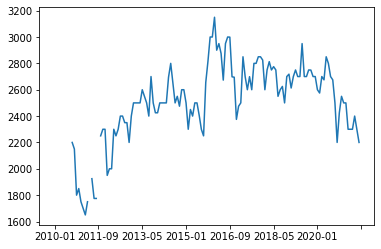

In [252]:
rent_df.loc[rent_df['Neighborhood']=='Red Hook'].iloc[0,3:-1].plot.line()

In [265]:
rent_df.iloc[:,3:] = round(rent_df.iloc[:,3:].interpolate(axis=1),2)

/Users/epavlov/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [266]:
rent_df

,Neighborhood,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,Slope
0,Bath Beach,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1695.0,1698.0,1750.0,1799.0,1750.0,1733.0,1799.0,1700.0,1750.0,1750.00
1,Bay Ridge,Brooklyn,neighborhood,1350.0,1388.0,1350.0,1350.0,1350.0,1350.0,1300.0,...,1750.0,1750.0,1750.0,1799.0,1750.0,1750.0,1750.0,1750.0,1800.0,0.14
2,Bedford-Stuyvesant,Brooklyn,neighborhood,1650.0,1650.0,1600.0,1650.0,1650.0,1593.0,1460.0,...,2250.0,2250.0,2250.0,2261.0,2300.0,2383.0,2475.0,2599.0,2650.0,0.10
3,Parkville/Bensonhurst,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1525.0,1550.0,1625.0,1738.0,1650.0,1650.0,1700.0,1695.0,1700.0,1700.00
4,Bergen Beach,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2450.0,2450.0,2450.0,2450.0,2450.0,2450.0,2450.0,2450.0,2450.0,2450.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Kensington/Windsor Terrace,Brooklyn,neighborhood,1700.0,1712.5,1712.5,1787.5,1800.0,1825.0,1995.0,...,2314.0,2312.5,2175.0,2250.0,2147.5,2000.0,2150.0,2299.0,2250.0,0.15
61,Park Slope/Gowanus,Brooklyn,neighborhood,2200.0,1875.0,2200.0,2200.0,2125.0,2485.0,2400.0,...,2722.0,2645.0,2650.0,2597.5,2662.5,2724.5,2835.5,2863.0,2925.0,0.08
62,Park Slope/Windsor Terrace,Brooklyn,neighborhood,1900.0,1900.0,1925.0,1900.0,2125.0,2155.0,2197.5,...,2700.0,2720.0,2587.5,2650.0,2550.0,2424.5,2549.0,2705.5,2675.0,0.14
63,Sheepshead Bay/Brighton Beach,Brooklyn,neighborhood,1400.0,1225.0,1200.0,1250.0,1750.0,1725.0,1512.5,...,1937.5,1879.0,1825.0,1847.5,1825.0,1868.5,1856.5,1850.0,1875.0,1875.00


In [262]:
# rent_df.iloc[:,3:].dropna(how="all")
cols = rent_df.columns[3:]
rent_df = rent_df.dropna(subset=cols,how="all")

In [263]:
rent_df

,Neighborhood,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,Slope
0,Bath Beach,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1695.0,1698.0,1750.0,1799.0,1750.0,1733.0,1799.0,1700.0,1750.0,1750.000000
1,Bay Ridge,Brooklyn,neighborhood,1350.0,1388.0,1350.0,1350.0,1350.0,1350.0,1300.0,...,1750.0,1750.0,1750.0,1799.0,1750.0,1750.0,1750.0,1750.0,1800.0,0.140587
2,Bedford-Stuyvesant,Brooklyn,neighborhood,1650.0,1650.0,1600.0,1650.0,1650.0,1593.0,1460.0,...,2250.0,2250.0,2250.0,2261.0,2300.0,2383.0,2475.0,2599.0,2650.0,0.103747
3,Parkville/Bensonhurst,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1525.0,1550.0,1625.0,1738.0,1650.0,1650.0,1700.0,1695.0,1700.0,1700.000000
4,Bergen Beach,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2450.0,2450.0,2450.0,2450.0,2450.0,2450.0,2450.0,2450.0,2450.0,2450.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Kensington/Windsor Terrace,Brooklyn,neighborhood,1700.0,1712.5,1712.5,1787.5,1800.0,1825.0,1995.0,...,2314.0,2312.5,2175.0,2250.0,2147.5,2000.0,2150.0,2299.0,2250.0,0.152445
61,Park Slope/Gowanus,Brooklyn,neighborhood,2200.0,1875.0,2200.0,2200.0,2125.0,2485.0,2400.0,...,2722.0,2645.0,2650.0,2597.5,2662.5,2724.5,2835.5,2863.0,2925.0,0.081169
62,Park Slope/Windsor Terrace,Brooklyn,neighborhood,1900.0,1900.0,1925.0,1900.0,2125.0,2155.0,2197.5,...,2700.0,2720.0,2587.5,2650.0,2550.0,2424.5,2549.0,2705.5,2675.0,0.141400
63,Sheepshead Bay/Brighton Beach,Brooklyn,neighborhood,1400.0,1225.0,1200.0,1250.0,1750.0,1725.0,1512.5,...,1937.5,1879.0,1825.0,1847.5,1825.0,1868.5,1856.5,1850.0,1875.0,1875.000000


In [273]:
rent_df.iloc[:,3:].apply(pd.Series.first_valid_index, axis=0)

2010-01    1
2010-02    1
2010-03    1
2010-04    1
2010-05    1
          ..
2021-05    0
2021-06    0
2021-07    0
2021-08    0
Slope      0
Length: 141, dtype: int64